# Code for Data Viz

Language: R

## 1. Setup

### 1.1 Install ggplot2

In [ ]:
# Install ggplot2
install.packages("ggplot2")

### 1.2 Load ggplot2

In [2]:
# Load ggplot2
library(ggplot2)

### 1.3 Load airquality Data

In [3]:
# Load and preview the dataset

## Set the seed for reproducibility
set.seed(11)

## Create the dataset
productivity <- data.frame(
  Date = seq(as.Date("2024-01-01"), as.Date("2024-01-31"), by = "day"),
  Day_of_Week = weekdays(seq(as.Date("2024-01-01"), as.Date("2024-01-31"), by = "day")),
  Tasks_Completed = sample(1:10, 31, replace = TRUE), 
  Hours_Worked = sample(4:10, 31, replace = TRUE),
  Mood = sample(1:5, 31, replace = TRUE), # 1: Very Bad, 5: Excellent
  Sleep_Hours = sample(6:9, 31, replace = TRUE),
  Caffeine_Intake = sample(0:3, 31, replace = TRUE) 
)

## Preview the dataset
head(productivity)

,Date,Day_of_Week,Tasks_Completed,Hours_Worked,Mood,Sleep_Hours,Caffeine_Intake
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>
1,2024-01-01,Monday,10,4,5,8,1
2,2024-01-02,Tuesday,2,7,1,7,2
3,2024-01-03,Wednesday,8,10,3,9,2
4,2024-01-04,Thursday,9,7,4,7,0
5,2024-01-05,Friday,1,8,3,9,2
6,2024-01-06,Saturday,5,4,3,8,0


## 2. Basic Plots

### 2.1 Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


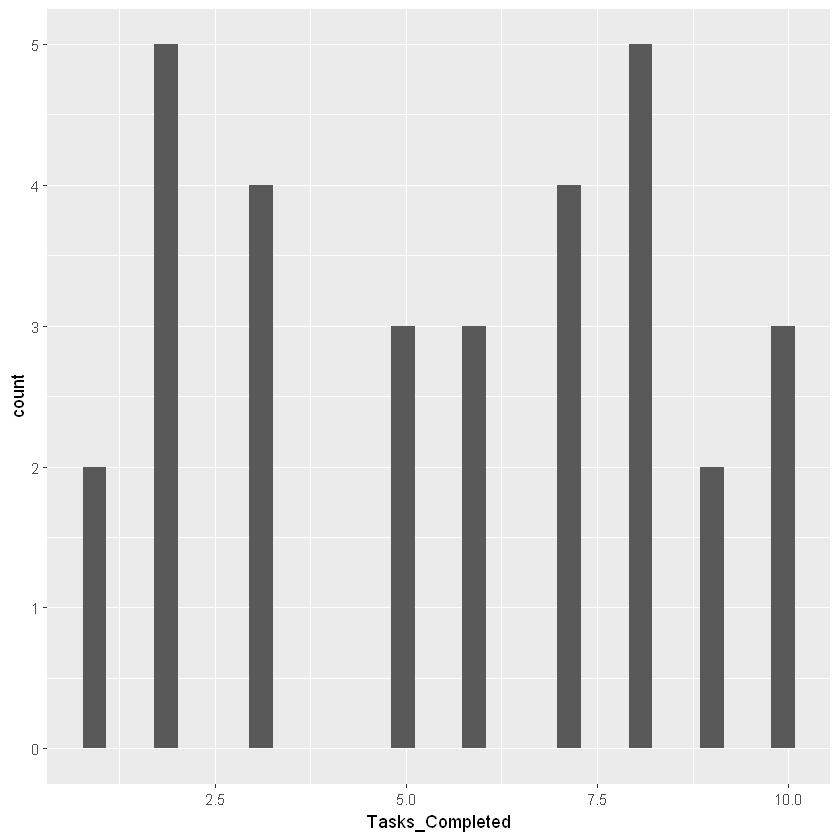

In [40]:
# Histogram (default binwidth)
ggplot(productivity, aes(x = Tasks_Completed)) +
  geom_histogram()

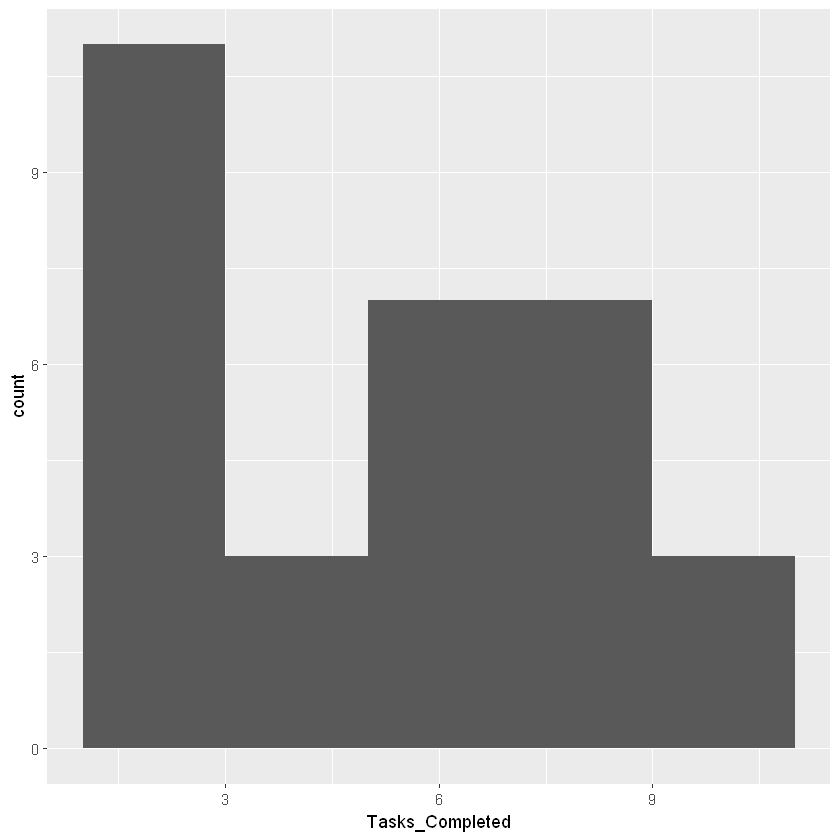

In [6]:
# Histogram with binwidth = 2
ggplot(productivity, aes(x = Tasks_Completed)) +
  geom_histogram(binwidth = 2)

### 2.2 Box Plots

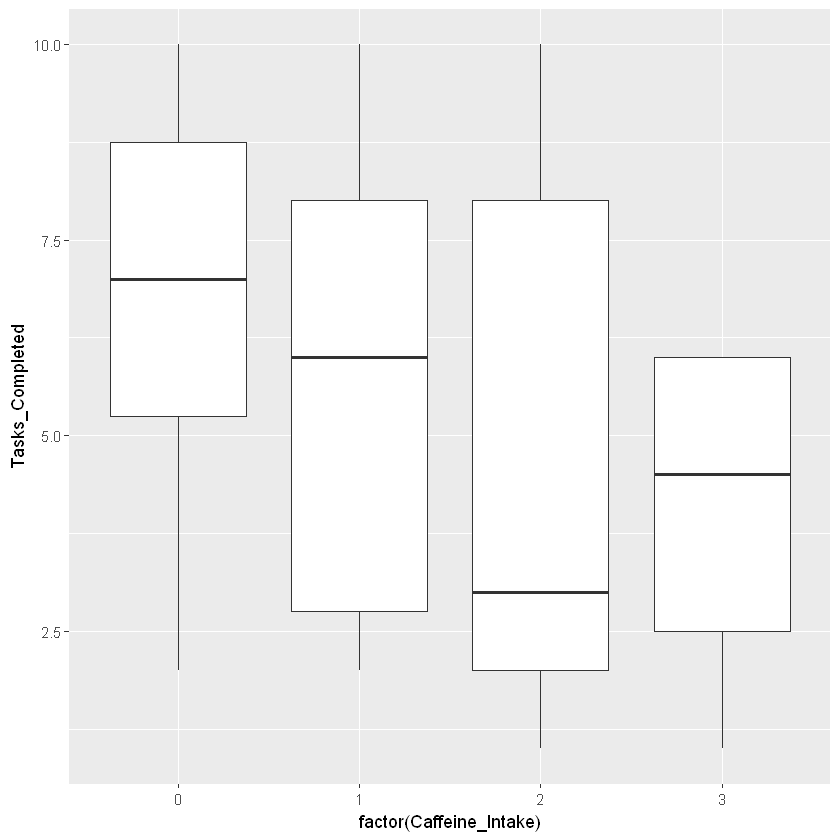

In [7]:
# Box plot
ggplot(productivity, aes(x = factor(Caffeine_Intake), y = Tasks_Completed)) +
  geom_boxplot()

### 2.3 Scatter Plots

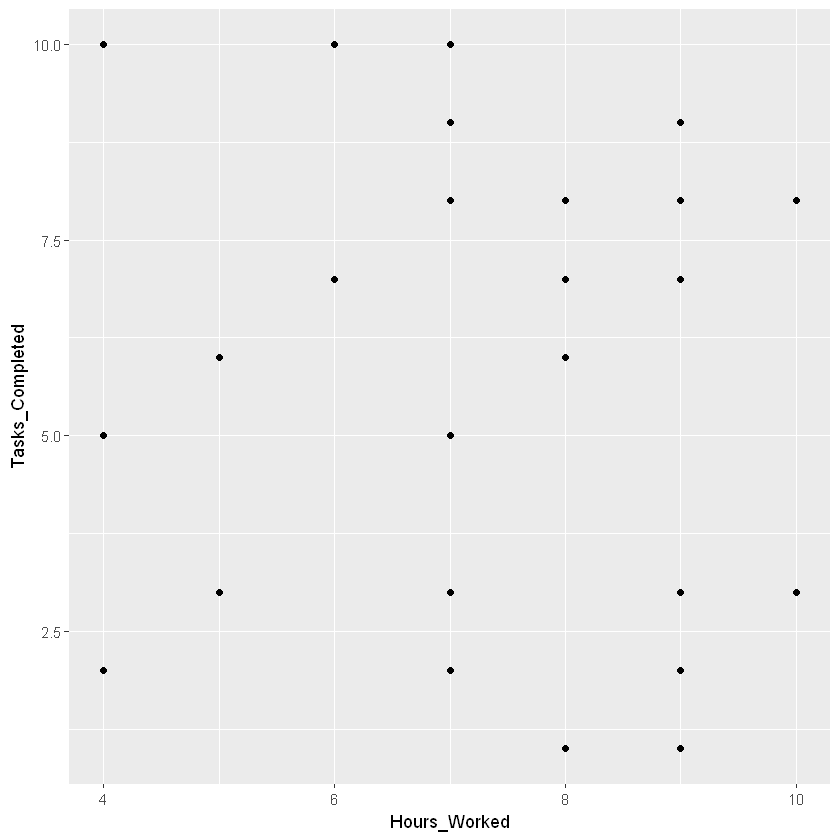

In [13]:
# Scatter plot
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
  geom_point()

`geom_smooth()` using formula = 'y ~ x'


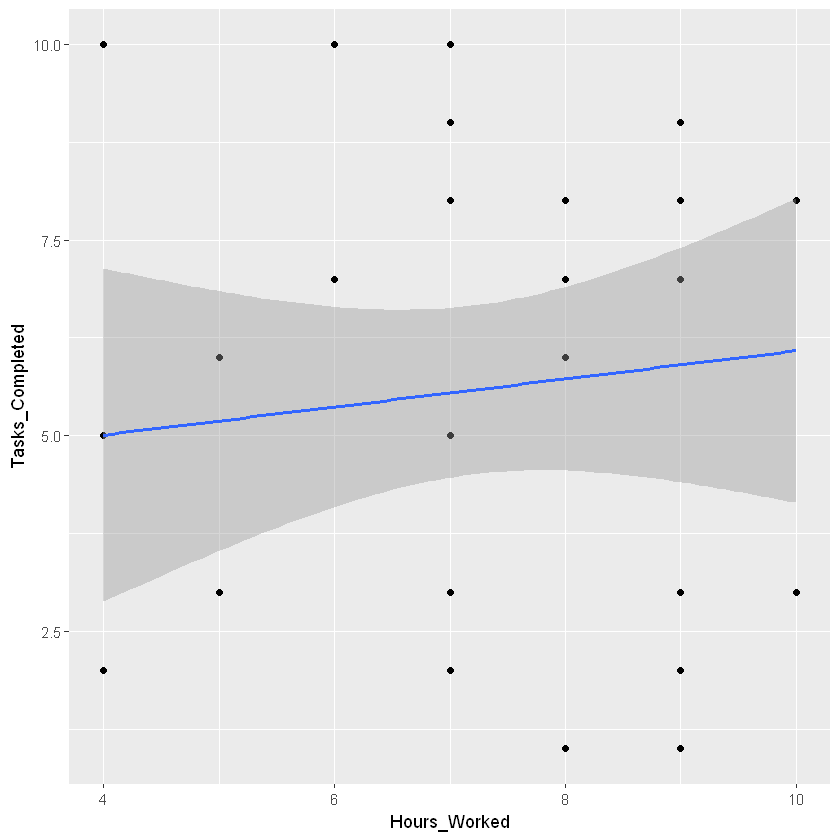

In [9]:
# Scatter plot with trend line
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
  geom_point() +
  geom_smooth(method = "lm")

### 2.4 Line Plots

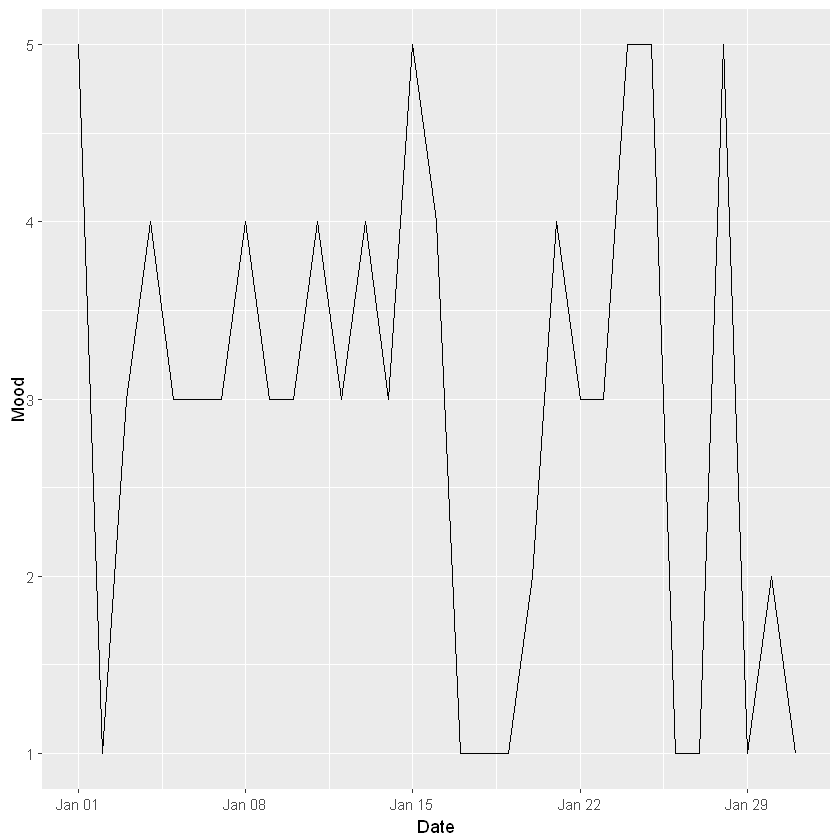

In [10]:
# Line plot
ggplot(productivity, aes(x = Date, y = Mood, group = 1)) +
  geom_line()

### 2.5 Bar Plots

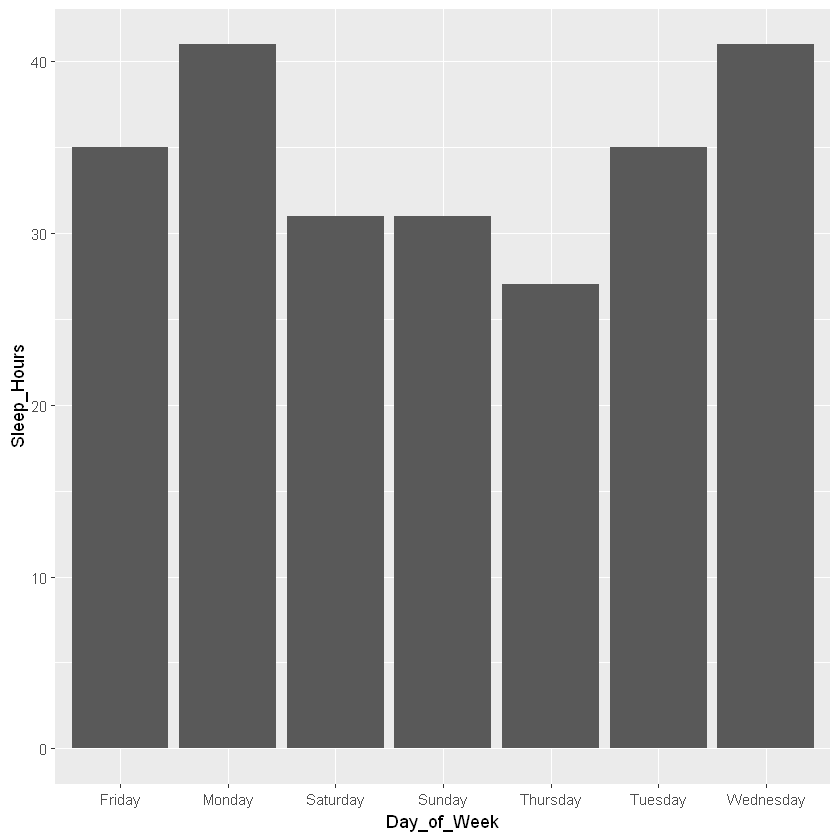

In [11]:
# Bar plot
ggplot(productivity, aes(x = Day_of_Week, y = Sleep_Hours)) +
  geom_col()


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




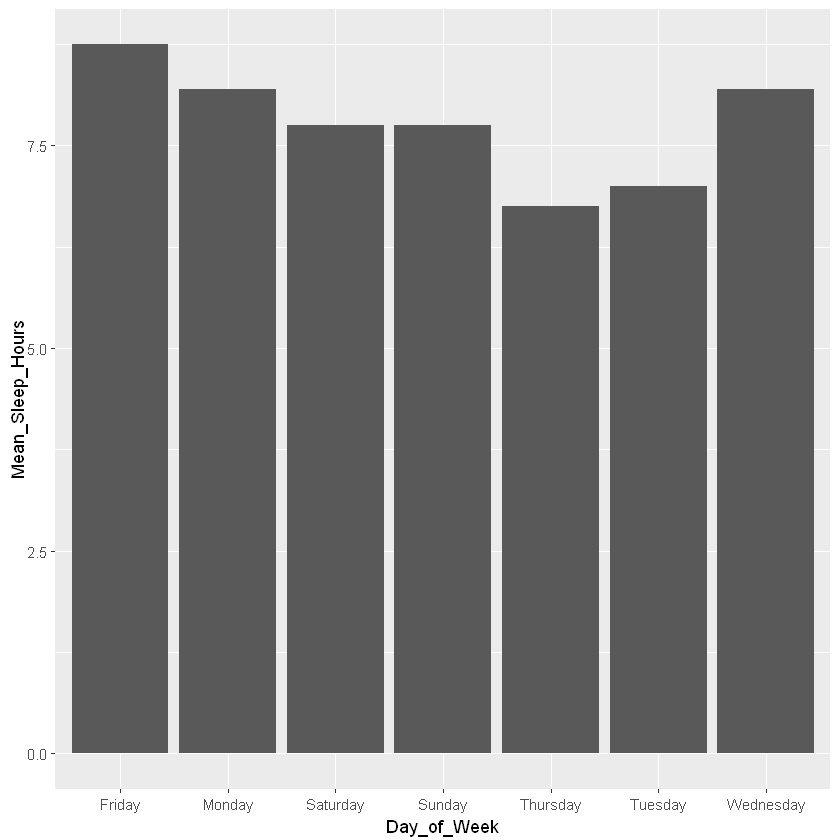

In [15]:
# Bar plot with mean sleep hours

## Load dplyr
library(dplyr)

## Calculate mean sleep hours
productivity_avg_sleep_hr <- productivity |>
    group_by(Day_of_Week) |>
    summarise(Mean_Sleep_Hours = mean(Sleep_Hours))

## Create a bar plot
ggplot(productivity_avg_sleep_hr, aes(x = Day_of_Week, y = Mean_Sleep_Hours)) +
    geom_col()

## 3. Adding a Third Variable

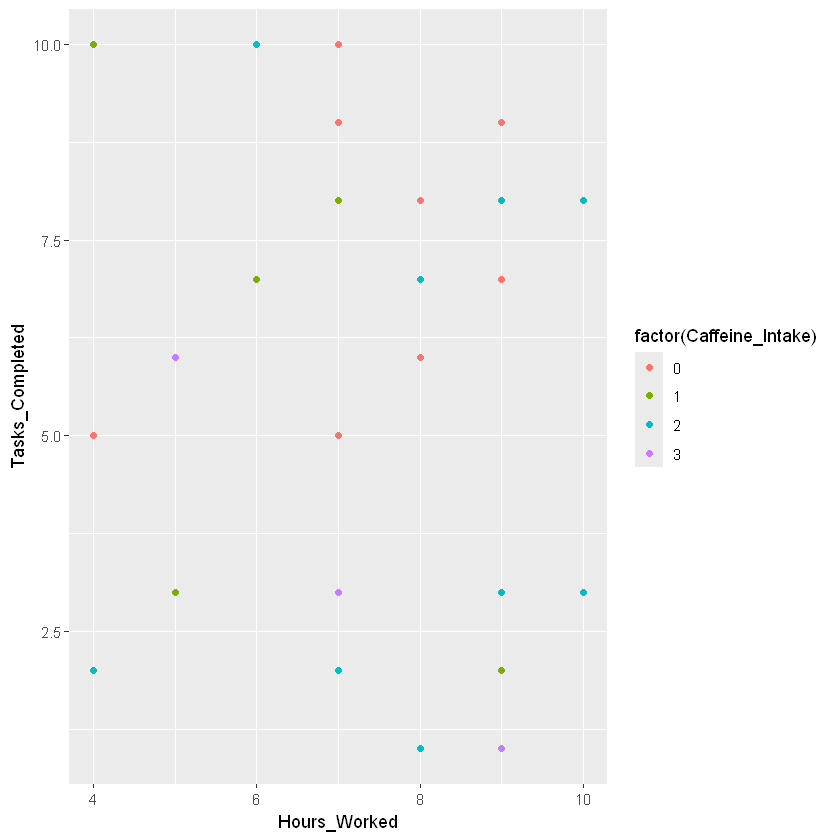

In [5]:
# Adding mood to scatter plot with color
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed, color = factor(Caffeine_Intake))) +
  geom_point()

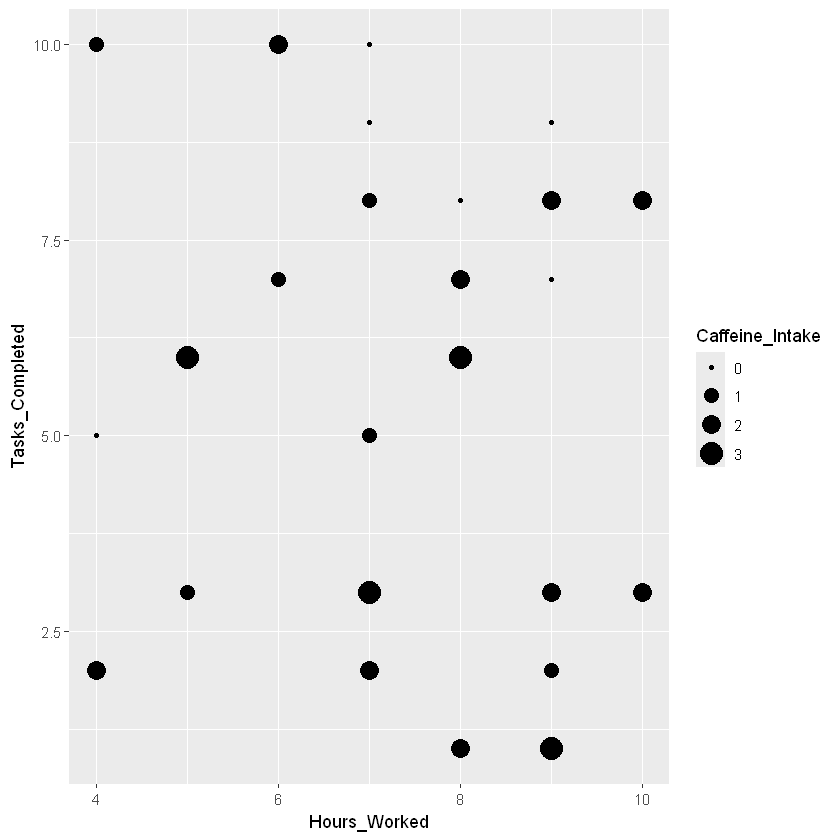

In [39]:
# Adding mood to scatter plot with size
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed, size = Caffeine_Intake)) +
  geom_point()

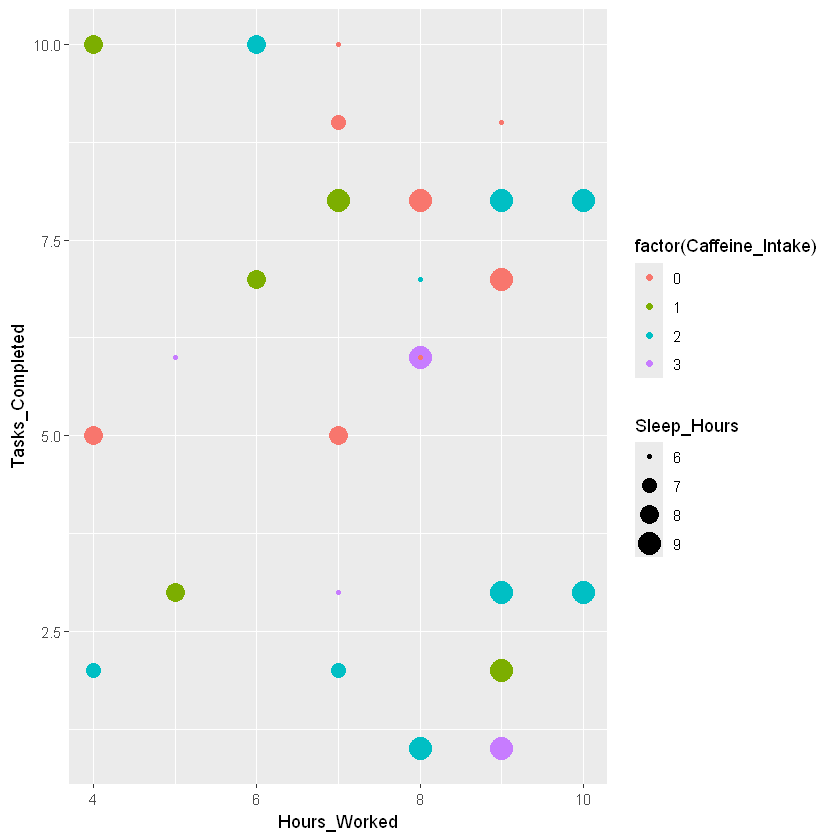

In [ ]:
# Add a fourth variable (Sleep_Hours)
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed, color = factor(Caffeine_Intake), size = Sleep_Hours)) +
  geom_point()

## 4. Customisations

### 4.1 Attributes

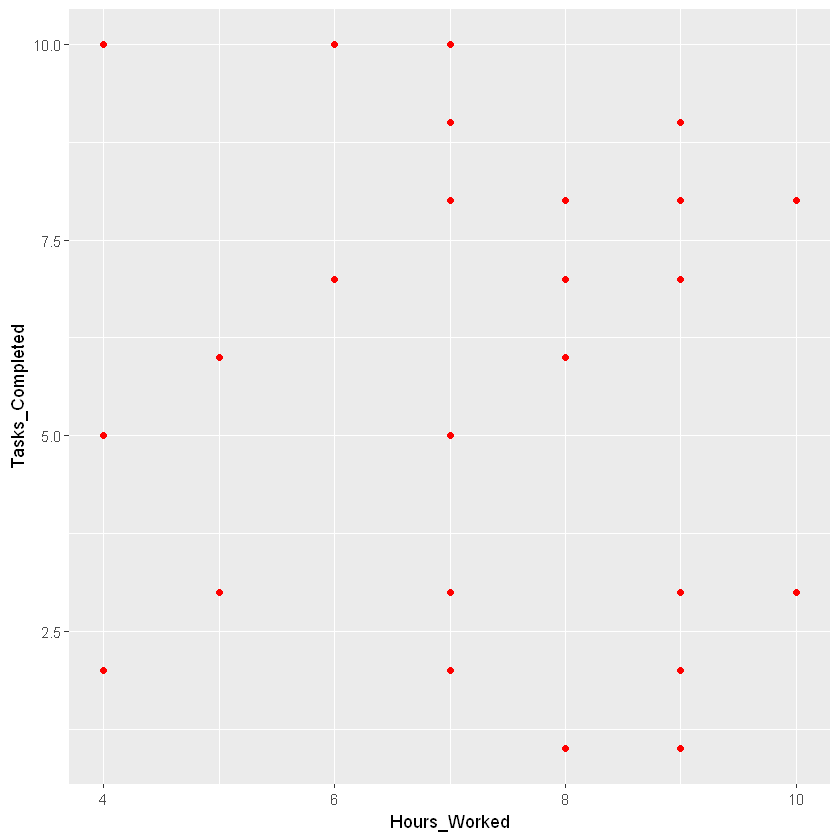

In [16]:
## Adjust color
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
  geom_point(color = "Red")

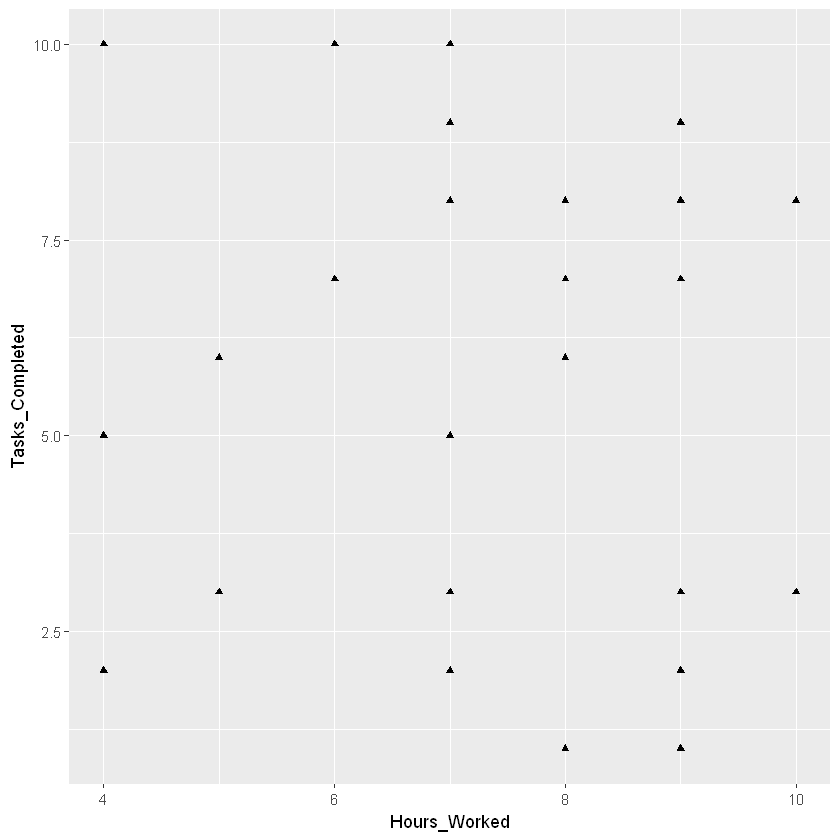

In [17]:
# Adjust shape
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
  geom_point(shape = 17)

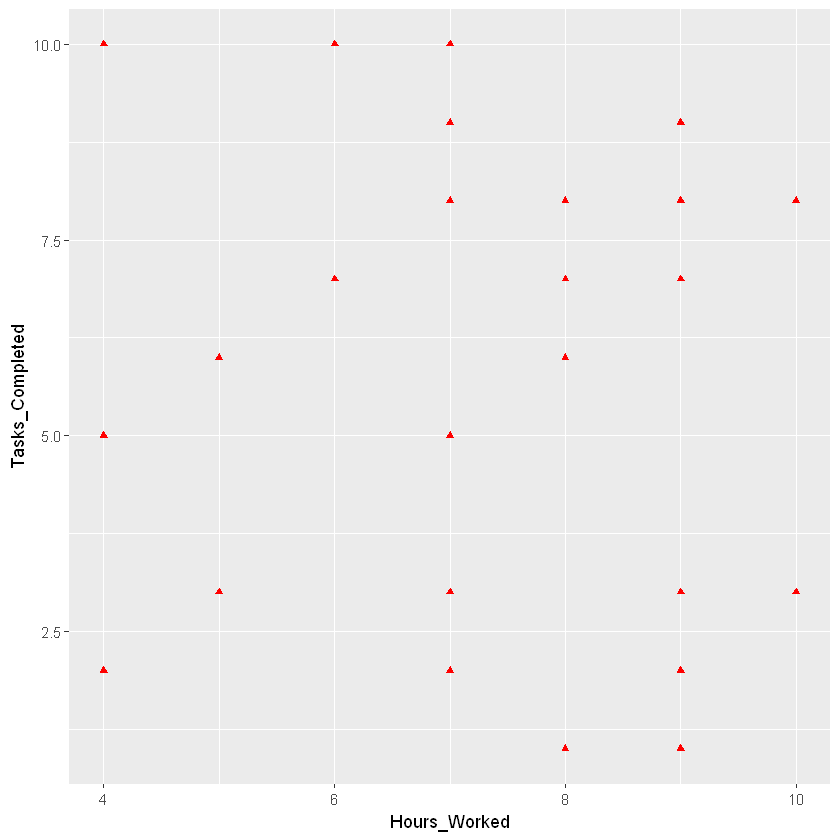

In [18]:
# Adjust color and shape
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
  geom_point(color = "Red", shape = 17)

### 4.2 Themes

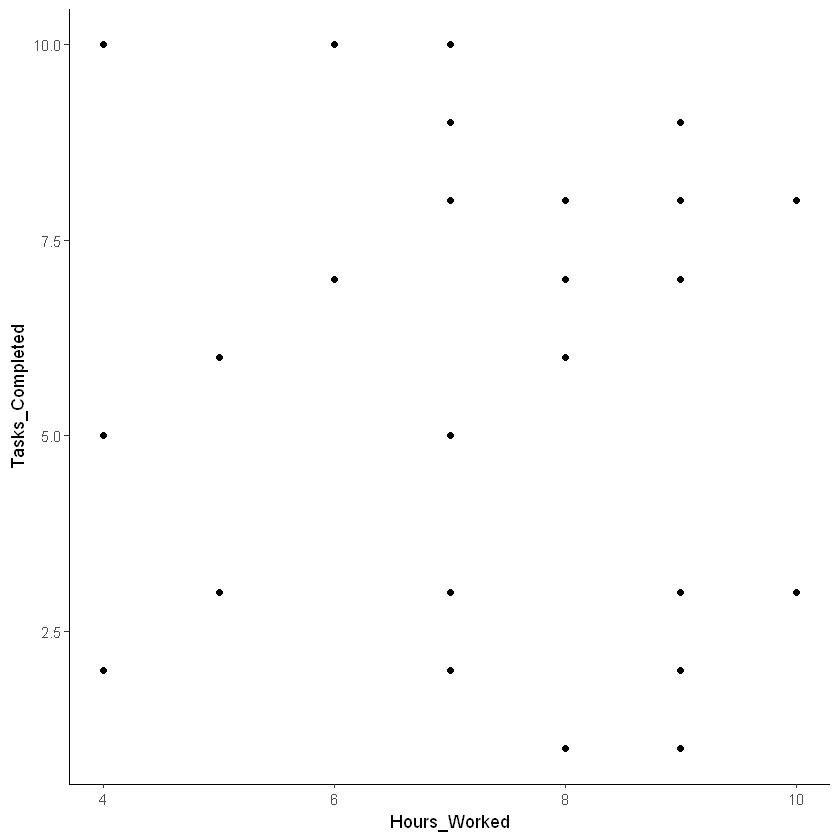

In [23]:
# Classic theme
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
  geom_point() +
  theme_classic()

### 4.3 Labels

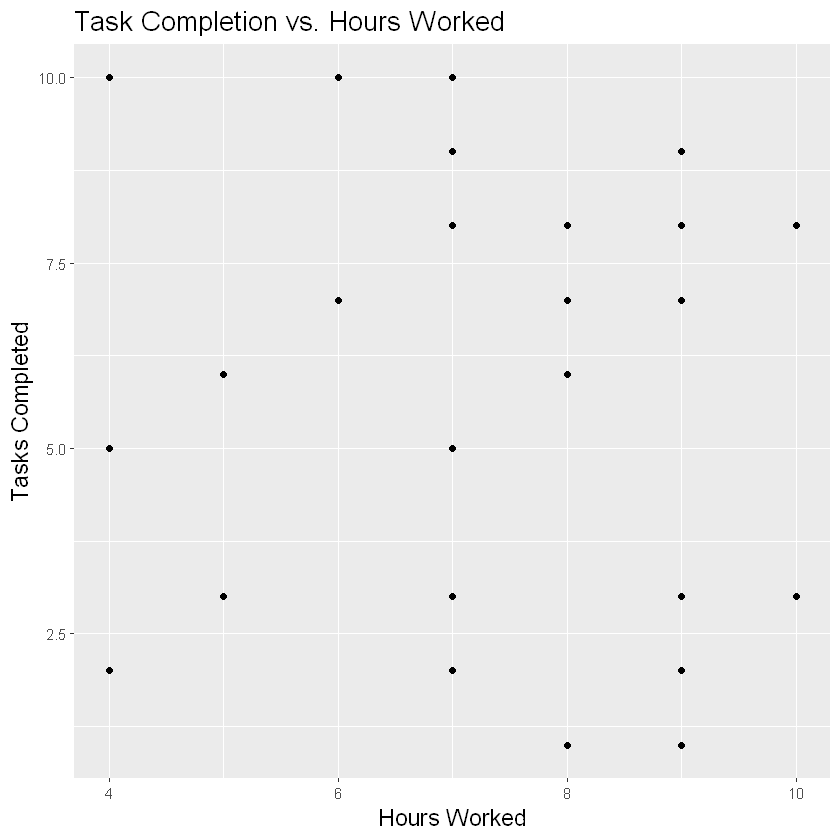

In [ ]:
## Add labels
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed)) +
     geom_point() +
     theme(plot.title = element_text(size = 16),
          axis.title.x = element_text(size = 14), 
          axis.title.y = element_text(size = 14)) +
     labs(title = "Task Completion vs. Hours Worked",
          x = "Hours Worked",
          y = "Tasks Completed",
          color = "Caffeine Intake")

## 5. All Together

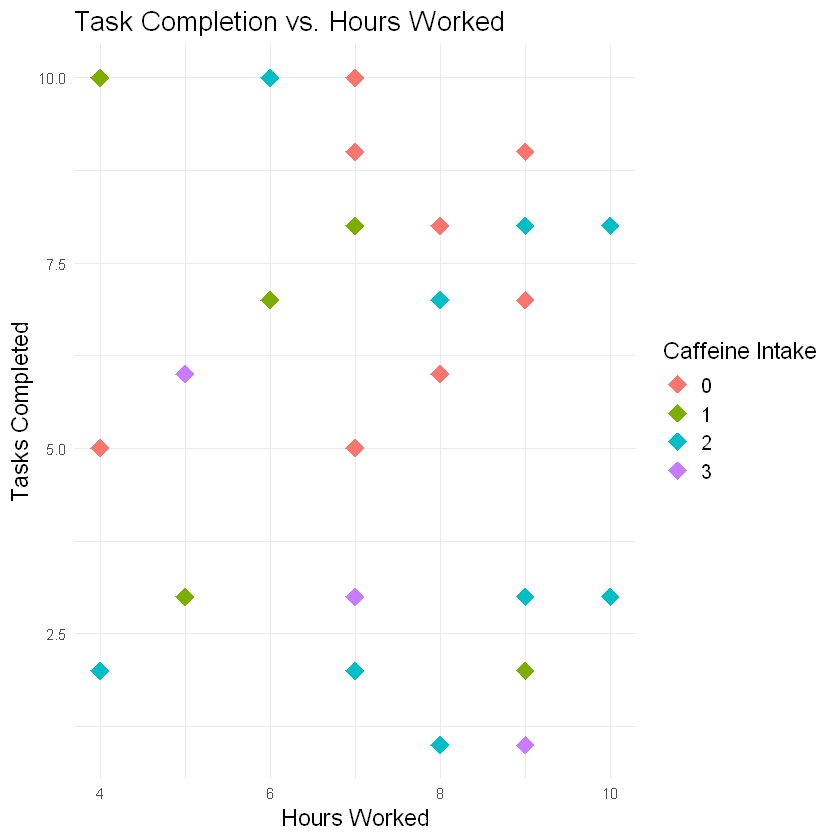

In [37]:
# Put it all together
ggplot(productivity, aes(x = Hours_Worked, y = Tasks_Completed, color = factor(Caffeine_Intake))) +
     geom_point(size = 5, shape = 18) +
     theme_minimal() +
     theme(plot.title = element_text(size = 16),
          axis.title.x = element_text(size = 14), 
          axis.title.y = element_text(size = 14),
          legend.text = element_text(size = 12), 
          legend.title = element_text(size = 14)) +
     labs(title = "Task Completion vs. Hours Worked",
          x = "Hours Worked",
          y = "Tasks Completed",
          color = "Caffeine Intake")